In [1]:
!pip install selenium

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [3]:
macbook_air=[]

In [4]:
for i in range (1,41):
    mac=[]
    url="https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5W4NNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviewsshowViewpoints=1&pageNumber="+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        mac.append(reviews[i].text)
    macbook_air=macbook_air+mac    
        

In [5]:
macbook_air

["\n\n  Best in class. Performance, Display, Battery backup are above excellent.A must have for every tech geekBought this after selling my Yamaha R15, but no regrets.... It's speed is better than R15. 😅\n\n",
 "\n\n  Pros:-1. It's Superfast. It will feel fast on everything - from bootup, to app opening, to builds etc.2. It's slim. Air has no fan hence it's form factor is even slimmer than Pro.3. It remains cold even during heavy code builds. It's hard to find things which makes it warm actually.4. I have tried several graphics heavy games and they run great without any heat as well5. If you are just browsing with Wifi on, typically it loses 10% battery in 7-8 hours. But it's for Safari browser. It has achieved I guess what people will call power-efficiency nirvana.6. Screen, Sound and Mic quality are awesomeCons:-1. Since it's winters in India now, some people might not like that it doesn't heat up the surroundings2. For longer workloads - like if you are doing daily large video compr

In [6]:
macbook_air=list(set(macbook_air))

In [7]:
text=' '.join(macbook_air)

In [8]:
text

"\n\n  Ordered the M1 Air on 5th August and got it delivered on the 7th. Then on 18th noticed a black/grey spot on the display... quick google search revealed this as a dead pixel and quite common with M1 Macs. So I called up Apple and they offered me two options, either a new replacement Mac or full refund since mine is still under 14 days. As soon as I revealed that I purchased from Amazon, the Apple sales team said sorry they can't help me since Amazon is not Apple authorised seller.I'm never buying another Apple product from Amazon again. If you want the full Apple experience like seamless replacement, refund or after sales then you need to buy it from Apple or from any of its authorised sellers. I made a costly mistake hope others will not after reading this message.\n\n \n\n  There is nothing that I could have asked more from this machine and from the seller “Amazon”I m a programmer and have always relied on beefy systems for my usage. I was a little apprehensive about the machin

In [9]:
text = re.sub("[^A-Za-z" "]+"," ",text).lower() #remove special character
text = re.sub("[0-9" "]+"," ",text).lower() #remove numbers
text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text).lower()             

In [10]:
text_tokens = word_tokenize(text)

In [11]:
text_tokens

['ordered',
 'the',
 'm',
 'air',
 'on',
 'th',
 'august',
 'and',
 'got',
 'it',
 'delivered',
 'on',
 'the',
 'th',
 'then',
 'on',
 'th',
 'noticed',
 'a',
 'black',
 'grey',
 'spot',
 'on',
 'the',
 'display',
 'quick',
 'google',
 'search',
 'revealed',
 'this',
 'as',
 'a',
 'dead',
 'pixel',
 'and',
 'quite',
 'common',
 'with',
 'm',
 'macs',
 'so',
 'i',
 'called',
 'up',
 'apple',
 'and',
 'they',
 'offered',
 'me',
 'two',
 'options',
 'either',
 'a',
 'new',
 'replacement',
 'mac',
 'or',
 'full',
 'refund',
 'since',
 'mine',
 'is',
 'still',
 'under',
 'days',
 'as',
 'soon',
 'as',
 'i',
 'revealed',
 'that',
 'i',
 'purchased',
 'from',
 'amazon',
 'the',
 'apple',
 'sales',
 'team',
 'said',
 'sorry',
 'they',
 'can',
 't',
 'help',
 'me',
 'since',
 'amazon',
 'is',
 'not',
 'apple',
 'authorised',
 'seller',
 'i',
 'm',
 'never',
 'buying',
 'another',
 'apple',
 'product',
 'from',
 'amazon',
 'again',
 'if',
 'you',
 'want',
 'the',
 'full',
 'apple',
 'experience'

In [12]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]

In [13]:
tf=TfidfVectorizer()

In [14]:
text_tf=tf.fit_transform(text_without_sw)

In [15]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

In [16]:
df

,aarch,able,absolute,absolutely,acceptable,accesories,accessories,accustomed,achieved,across,...,xps,yamaha,year,years,yes,yet,youtube,zephyrus,zips,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
words_list=" ".join(df)

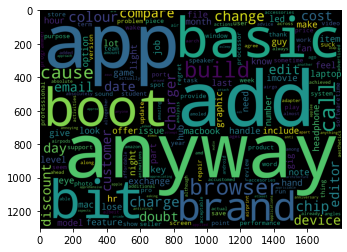

In [18]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)

In [19]:
with open ("C://datasets//positive-words.txt","r") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]


In [20]:
with open ("C://datasets//negative-words.txt","r") as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:]    

In [21]:
neg_text=" ".join([word for word in df if not word in negative_words])

In [22]:
pos_text=" ".join([word for word in df if not word  in positive_words])

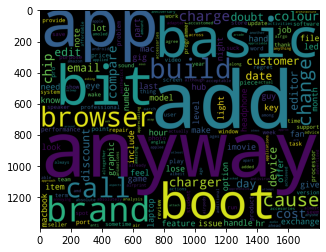

In [23]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

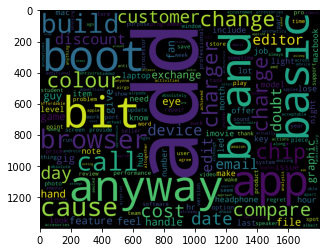

In [24]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)